In [6]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [8]:
character_1best_files = []
token_1best_files = []
node_1best_files = []

character_2mid_files = []
token_2mid_files = []
node_2mid_files = []

character_3mid_files = []
token_3mid_files = []
node_3mid_files = []

character_4worst_files = []
token_4worst_files = []
node_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
node_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
node_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"


character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
node_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"


character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
node_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"


for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_1best_file_path):
    for filename in filenames:
        node_1best_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_2mid_file_path):
    for filename in filenames:
        node_2mid_files.append(os.path.join(parent, filename))        
  


for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_3mid_file_path):
    for filename in filenames:
        node_3mid_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(node_4worst_file_path):
    for filename in filenames:
        node_4worst_files.append(os.path.join(parent, filename))        

In [9]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[float(num) for num in line.split(',') if num != "\n"][:154] for line in f ]
        matrixList.append(np.array(matrix))

In [11]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)
matrixFileToMatrix(node_1best_files, best1_input_nodes)

print("done")

#matrixFileToMatrix(character_2mid_files, mid2_input_chars)
#matrixFileToMatrix(token_2mid_files, mid2_input_tokens)
#matrixFileToMatrix(node_2mid_files, mid2_input_nodes)

print("done")

#matrixFileToMatrix(character_3mid_files, mid3_input_chars)
#matrixFileToMatrix(token_3mid_files, mid3_input_tokens)
#matrixFileToMatrix(node_3mid_files, mid3_input_nodes)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)
matrixFileToMatrix(node_4worst_files, worst4_input_nodes)

done
done
done


In [13]:
best1_input_nodes = []

worst4_input_nodes = []

matrixFileToMatrix(node_1best_files, best1_input_nodes)
matrixFileToMatrix(node_4worst_files, worst4_input_nodes)

In [14]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1])

#for x in mid2_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,0,1,0])
    
#for x in mid3_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0, 1])

#for x in mid2_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,0,1,0])

#for x in mid3_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0])
   



for x in best1_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,1])

#for x in mid2_input_nodes:
 #   input4_nodes_x.append(x)
  #  input4_nodes_y.append([0,0,1,0])

#for x in mid3_input_nodes:
 #   input4_nodes_x.append(x)
  #  input4_nodes_y.append([0,1,0,0])

for x in worst4_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([1,0])

In [15]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []

In [16]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

input4_nodes_x = np.array(input4_nodes_x)
input4_nodes_y = np.array(input4_nodes_y)

In [17]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

print(input4_nodes_x.shape)
print(input4_nodes_y.shape)

(3587, 496, 154)
(3587, 2)
(3587, 496, 154)
(3587, 2)
(3587, 496, 154)
(3587, 2)


In [18]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

input4_nodes_x, input4_nodes_y = shuffle(input4_nodes_x, input4_nodes_y, random_state=0)

In [19]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

x_tokens_train4, x_tokens_test4, y_tokens_train4, y_tokens_test4 = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

x_nodes_train4, x_nodes_test4, y_nodes_train4, y_nodes_test4 = train_test_split(
    input4_nodes_x, input4_nodes_y, test_size = 0.2, random_state=24)

In [20]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

In [23]:
batch_size = 64
epochs = 6

model_chars_input = Input((496,154,1))

model_chars = Conv2D(100, kernel_size=(2, 154), strides=(1,1),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_chars)
model_chars = Flatten()(model_chars)

model_tokens_input = Input((496,154,1))

model_tokens = Conv2D(100, kernel_size=(2, 154), strides=(1,1),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_tokens)
model_tokens = Flatten()(model_tokens)

model_nodes_input = Input((496,154,1))

model_nodes = Conv2D(100, kernel_size=(8, 154), strides=(1,1),
                 activation='relu')(model_nodes_input)
model_nodes = Conv2D(100, (9, 1), strides=(1,1), activation='relu')(model_nodes)
model_nodes = Conv2D(100, (10, 1), strides=(1,1), activation='relu')(model_nodes)
model_nodes = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_nodes)
model_nodes = Flatten()(model_nodes)

merged = Concatenate()([model_chars, model_tokens, model_nodes])
#merged = Dense(5, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(2, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input, model_nodes_input], outputs=[merged])

print(model_combined4.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_9 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                            

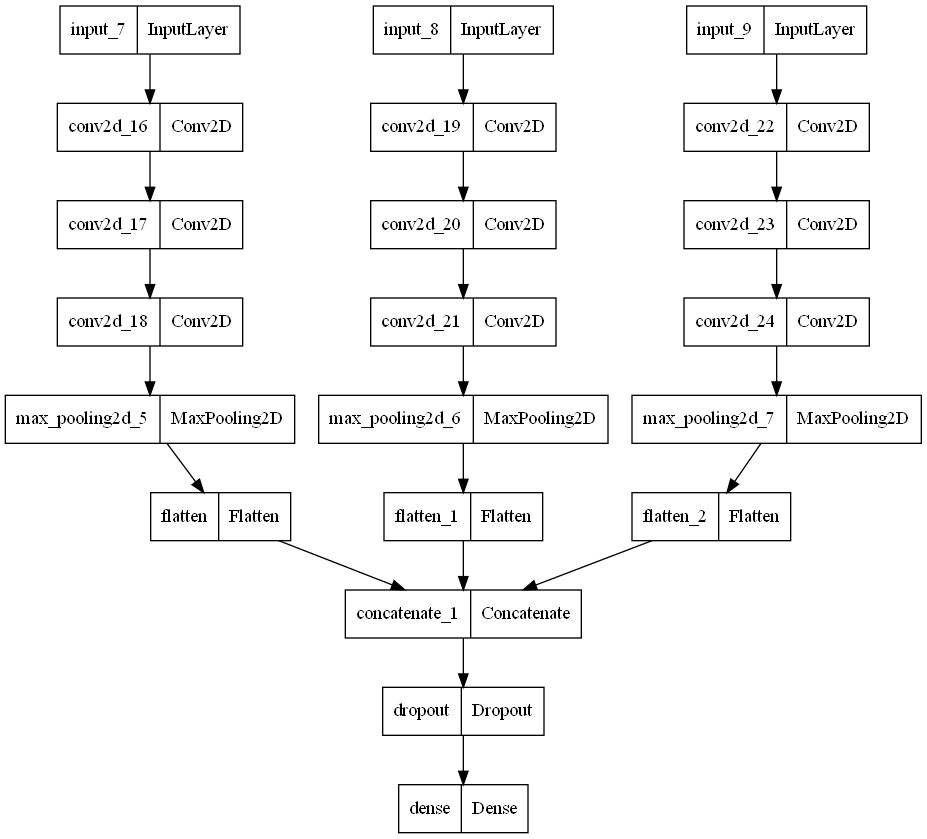

In [24]:
tf.keras.utils.plot_model(model_combined4)

In [25]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

combined4_fit = model_combined4.fit([x_characters_train4, x_tokens_train4, x_nodes_train4], y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test4, x_tokens_test4, x_nodes_test4], y_characters_test4))
combined4_score = model_combined4.evaluate([x_characters_test4, x_tokens_test4, x_nodes_test4], y_characters_test4, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
45/45 [==============================] - 105s 2s/step - loss: 3.4499 - accuracy: 0.9686 - val_loss: 0.7952 - val_accuracy: 0.9791
Epoch 2/6
45/45 [==============================] - 102s 2s/step - loss: 0.2610 - accuracy: 0.9899 - val_loss: 0.7059 - val_accuracy: 0.9875
Epoch 3/6
45/45 [==============================] - 102s 2s/step - loss: 0.4684 - accuracy: 0.9868 - val_loss: 0.8397 - val_accuracy: 0.9903
Epoch 4/6
45/45 [==============================] - 115s 3s/step - loss: 0.1295 - accuracy: 0.9902 - val_loss: 0.2659 - val_accuracy: 0.9875
Epoch 5/6
45/45 [==============================] - 109s 2s/step - loss: 0.1045 - accuracy: 0.9916 - val_loss: 0.3274 - val_accuracy: 0.9847
Epoch 6/6
45/45 [==============================] - 112s 2s/step - loss: 0.0434 - accuracy: 0.9937 - val_loss: 0.2086 - val_accuracy: 0.9903


ValueError: in user code:

    File "C:\Users\pauld\Anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\pauld\Anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pauld\Anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\pauld\Anaconda3\lib\site-packages\keras\engine\training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\pauld\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\pauld\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model" expects 3 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 496, 154) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 496, 154) dtype=float32>]


In [26]:
combined4_score = model_combined4.evaluate([x_characters_test4, x_tokens_test4, x_nodes_test4], y_characters_test4, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Test loss: 0.20858252048492432
Test accuracy: 0.9902507066726685


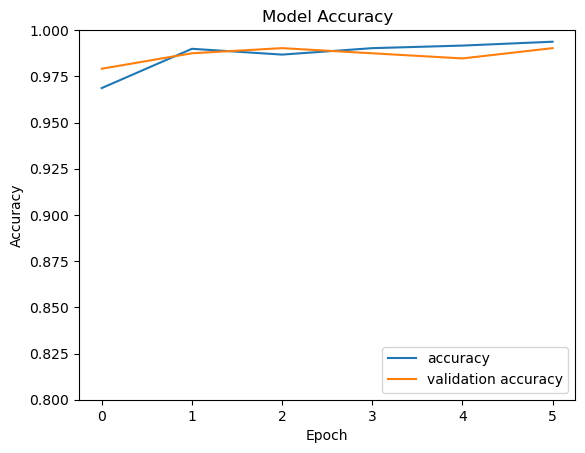

In [27]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

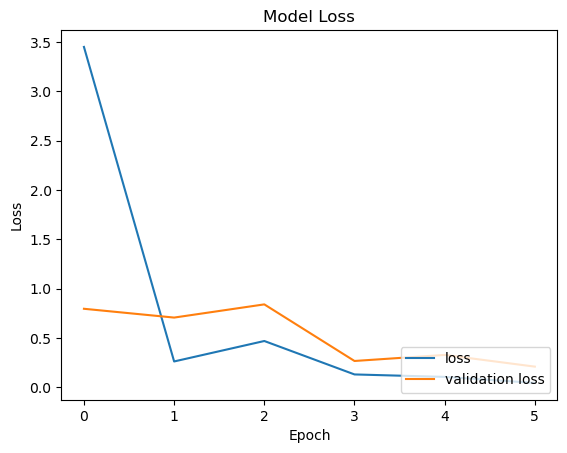

In [28]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [29]:
mi_predict2 = model_combined4.predict([x_characters_test4, x_tokens_test4, x_nodes_test4])

23/23 [==============================] - 7s 295ms/step


In [30]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[225   1]
 [  6 486]]


# Single Character Based

In [37]:
batch_size = 32
epochs = 6

model4 = Sequential()
model4.add(Conv2D(100, kernel_size=(2, 154),
                 activation='relu',
                 input_shape=(496,154,1)))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,1)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 495, 1, 100)       30900     
                                                                 
 conv2d_29 (Conv2D)          (None, 494, 1, 100)       20100     
                                                                 
 conv2d_30 (Conv2D)          (None, 493, 1, 100)       20100     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 246, 1, 100)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 24600)             0         
                                                                 
 dropout_2 (Dropout)         (None, 24600)             0         
                                                      

In [32]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
90/90 [==============================] - 34s 356ms/step - loss: 0.3009 - accuracy: 0.9756 - val_loss: 0.3317 - val_accuracy: 0.9819
Epoch 2/6
90/90 [==============================] - 29s 321ms/step - loss: 0.0935 - accuracy: 0.9847 - val_loss: 0.1032 - val_accuracy: 0.9875
Epoch 3/6
90/90 [==============================] - 30s 330ms/step - loss: 0.0436 - accuracy: 0.9892 - val_loss: 0.1031 - val_accuracy: 0.9903
Epoch 4/6
90/90 [==============================] - 29s 321ms/step - loss: 0.0563 - accuracy: 0.9902 - val_loss: 0.1920 - val_accuracy: 0.9889
Epoch 5/6
90/90 [==============================] - 26s 291ms/step - loss: 0.0754 - accuracy: 0.9892 - val_loss: 0.7009 - val_accuracy: 0.9847
Epoch 6/6
90/90 [==============================] - 33s 372ms/step - loss: 0.1968 - accuracy: 0.9875 - val_loss: 0.3089 - val_accuracy: 0.9847
Test loss: 0.3089163601398468
Test accuracy: 0.984679639339447


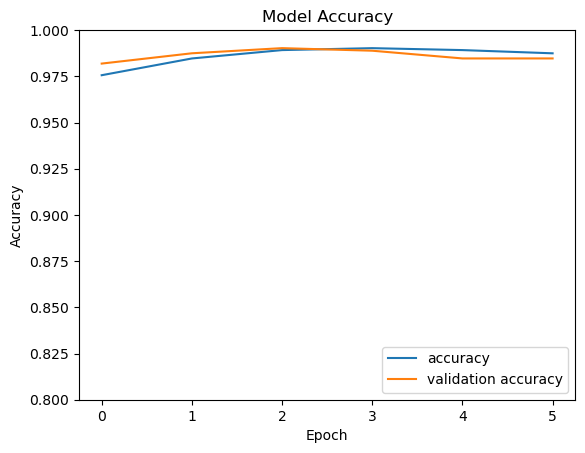

In [33]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

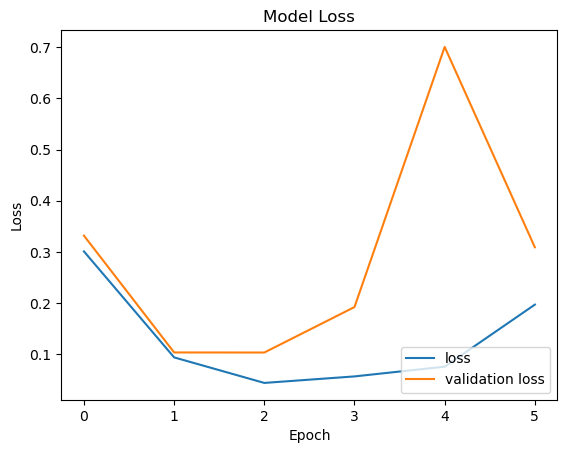

In [34]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [35]:
mi_predict2 = model4.predict(x_characters_test4)

23/23 [==============================] - 2s 92ms/step


In [36]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[222   4]
 [  7 485]]


# Token Based

In [38]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_tokens_train4, y_tokens_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
90/90 [==============================] - 29s 314ms/step - loss: 0.1752 - accuracy: 0.9843 - val_loss: 0.0922 - val_accuracy: 0.9903
Epoch 2/6
90/90 [==============================] - 29s 319ms/step - loss: 0.0802 - accuracy: 0.9854 - val_loss: 0.1361 - val_accuracy: 0.9903
Epoch 3/6
90/90 [==============================] - 33s 368ms/step - loss: 0.0527 - accuracy: 0.9885 - val_loss: 0.0623 - val_accuracy: 0.9791
Epoch 4/6
90/90 [==============================] - 30s 330ms/step - loss: 0.0377 - accuracy: 0.9892 - val_loss: 0.0414 - val_accuracy: 0.9903
Epoch 5/6
90/90 [==============================] - 33s 366ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0928 - val_accuracy: 0.9721
Epoch 6/6
90/90 [==============================] - 32s 360ms/step - loss: 0.0285 - accuracy: 0.9916 - val_loss: 0.0543 - val_accuracy: 0.9903
Test loss: 0.05427749827504158
Test accuracy: 0.9902507066726685


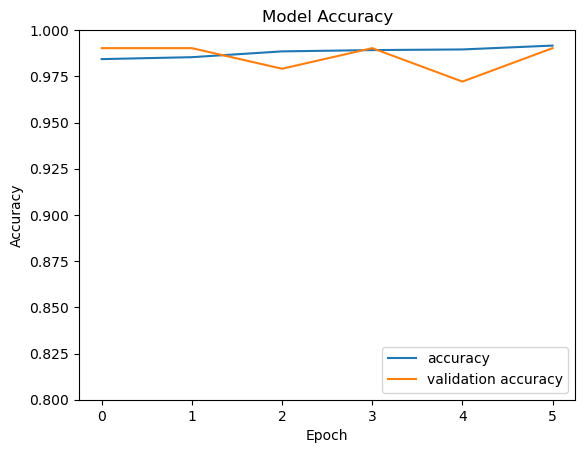

In [39]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

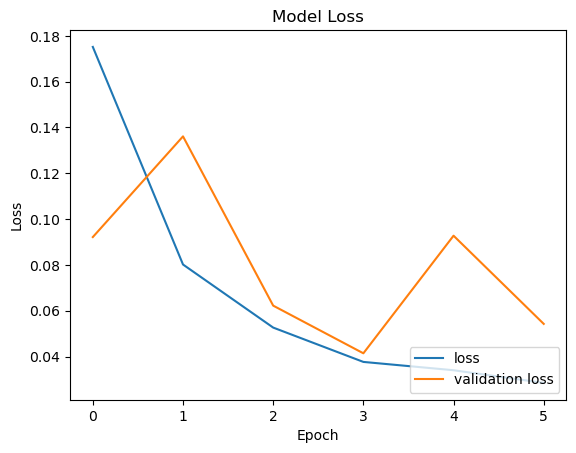

In [40]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [41]:
mi_predict2 = model4.predict(x_tokens_test4)

23/23 [==============================] - 2s 78ms/step


In [42]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_tokens_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[225   1]
 [  6 486]]


# Node Based

In [43]:
batch_size = 32
epochs = 6

model4 = Sequential()
model4.add(Conv2D(100, kernel_size=(8, 154),
                 activation='relu',
                 input_shape=(496,154,1)))
model4.add(Conv2D(100, (9, 1), activation='relu'))
model4.add(Conv2D(100, (10, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,1)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

print(model4.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 489, 1, 100)       123300    
                                                                 
 conv2d_32 (Conv2D)          (None, 481, 1, 100)       90100     
                                                                 
 conv2d_33 (Conv2D)          (None, 472, 1, 100)       100100    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 236, 1, 100)      0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 23600)             0         
                                                                 
 dropout_3 (Dropout)         (None, 23600)             0         
                                                      

In [44]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_nodes_train4, y_nodes_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
90/90 [==============================] - 58s 638ms/step - loss: 1.2915 - accuracy: 0.9285 - val_loss: 5.2994 - val_accuracy: 0.6852
Epoch 2/6
90/90 [==============================] - 63s 701ms/step - loss: 0.1481 - accuracy: 0.9529 - val_loss: 5.0154 - val_accuracy: 0.6852
Epoch 3/6
90/90 [==============================] - 71s 784ms/step - loss: 0.1438 - accuracy: 0.9585 - val_loss: 4.0385 - val_accuracy: 0.6852
Epoch 4/6
90/90 [==============================] - 61s 682ms/step - loss: 0.1330 - accuracy: 0.9592 - val_loss: 2.5492 - val_accuracy: 0.6852
Epoch 5/6
90/90 [==============================] - 59s 654ms/step - loss: 0.1305 - accuracy: 0.9585 - val_loss: 2.0182 - val_accuracy: 0.6852
Epoch 6/6
90/90 [==============================] - 59s 653ms/step - loss: 0.1232 - accuracy: 0.9613 - val_loss: 9.7980 - val_accuracy: 0.6852
Test loss: 9.798023223876953
Test accuracy: 0.6852367520332336


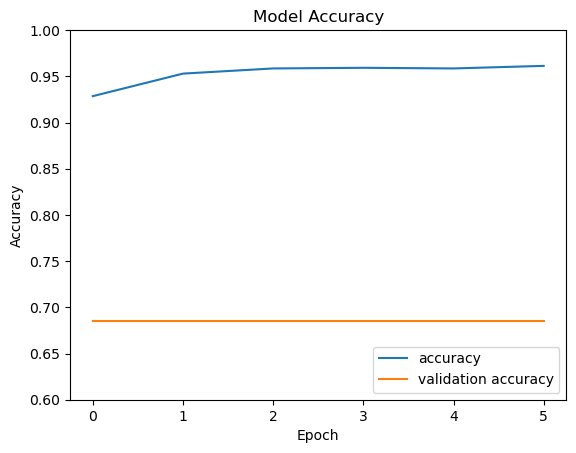

In [49]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='lower right')

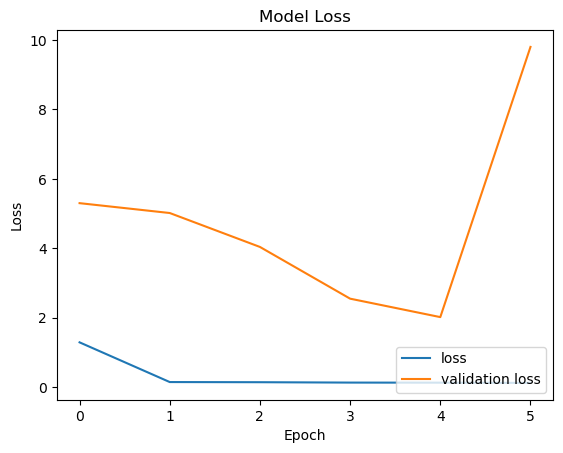

In [46]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [47]:
mi_predict2 = model4.predict(x_nodes_test4)

23/23 [==============================] - 4s 159ms/step


In [48]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_nodes_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[225   1]
 [ 22 470]]
